In [38]:
import scipy.sparse as sp
import argparse
import numpy as np
import os
import time
import polars as pl
import linear_dag as ld
from linear_dag.core.lineararg import LinearARG
import pandas as pd
from scipy.stats import chi2

In [36]:
from scipy.io import mmread

mtx_path = "../../../data/1kg_ALL_chr22_47876022_49355984_MAF_0.01_RF_0.01_T_8.genos.mtx"
genotypes = mmread(mtx_path).tocsc()
linarg = ld.LinearARG.from_genotypes(genotypes)
linarg = linarg.make_triangular()

In [19]:
import argparse
import numpy as np
import os
import polars as pl
import linear_dag as ld
from linear_dag.core.lineararg import LinearARG
from scipy.stats import chi2

linarg_dir = '/mnt/project/linear_args/ukb20279/chr1/'
beta_dir = '/mnt/project/lin_reg_benchmark/height_benchmark_w_covariates/beta_hats/'

partition_ids = os.listdir(f'{linarg_dir}/')
ind_arr = np.array([int(p.split("_")[0]) for p in partition_ids])
order = ind_arr.argsort()
partition_ids = np.array(partition_ids)[order].tolist()

beta_hats = np.load(f'{beta_dir}/{partition_ids[0]}_linarg.npy')
linarg = ld.LinearARG.read(f'{linarg_dir}/{partition_ids[0]}/linear_arg.npz', f'{linarg_dir}/{partition_ids[0]}/linear_arg.pvar', f'{linarg_dir}/{partition_ids[0]}/linear_arg.psam')    
df = linarg.variants.table
N = linarg.shape[0] / 2 # roughly, maybe change this to be exact
df = df.with_columns(pl.lit(beta_hats).alias('beta_hat'))
df = df.with_columns(pl.lit(beta_hats*N**0.5).alias('z-score'))
df = df.with_columns(pl.lit(beta_hats**2*N).alias('chi-squared'))
df = df.with_columns(pl.lit([chi2.sf(x, 1) for x in beta_hats**2*N]).alias('chi-squared_pval'))

for partition_id in partition_ids[1:]:
    
    beta_hats = np.load(f'{beta_dir}/{partition_id}_linarg.npy')
    linarg = ld.LinearARG.read(f'{linarg_dir}/{partition_id}/linear_arg.npz', f'{linarg_dir}/{partition_id}/linear_arg.pvar', f'{linarg_dir}/{partition_id}/linear_arg.psam')    
    df_partition = linarg.variants.table
    N = linarg.shape[0] / 2 # roughly, maybe change this to be exact
    df_partition = df_partition.with_columns(pl.lit(beta_hats).alias('beta_hat'))
    df_partition = df_partition.with_columns(pl.lit(beta_hats*N**0.5).alias('z-score'))
    df_partition = df_partition.with_columns(pl.lit(beta_hats**2*N).alias('chi-squared'))
    df = df.with_columns(pl.lit([chi2.sf(x, 1) for x in beta_hats**2*N]).alias('chi-squared_pval'))
    
    df = pl.concat([df, df_partition])

df.write_csv(f'{out_dir}/regression_statistics.csv')

NameError: name 'linarg_dir' is not defined

In [69]:
N = linarg.shape[0] / 2 # roughly, maybe change this to be exact
beta_hat = np.random.normal(0, 1/np.sqrt(N), linarg.shape[1])
# linarg = ld.LinearARG.read(f'{linarg_dir}/{partition_ids[0]}/linear_arg.npz', f'{linarg_dir}/{partition_ids[0]}/linear_arg.pvar', f'{linarg_dir}/{partition_ids[0]}/linear_arg.psam')    
df = linarg.variants.table

df = df.with_columns(pl.lit(beta_hats).alias('beta_hat'))
df = df.with_columns(pl.lit(beta_hats*N**0.5).alias('z-score'))
df = df.with_columns(pl.lit(beta_hats**2*N).alias('chi-squared'))
df = df.with_columns(pl.lit(np.array([chi2.sf(x, 1) for x in beta_hats**2*N])).alias('chi-squared_pval'))

In [70]:
import matplotlib.pyplot as plt

(array([15818.,    86.,    59.,    48.,    50.,    37.,    33.,    32.,
           40.,    30.]),
 array([0.      , 0.099964, 0.199928, 0.299892, 0.399856, 0.49982 ,
        0.599784, 0.699748, 0.799712, 0.899676, 0.99964 ]),
 <BarContainer object of 10 artists>)

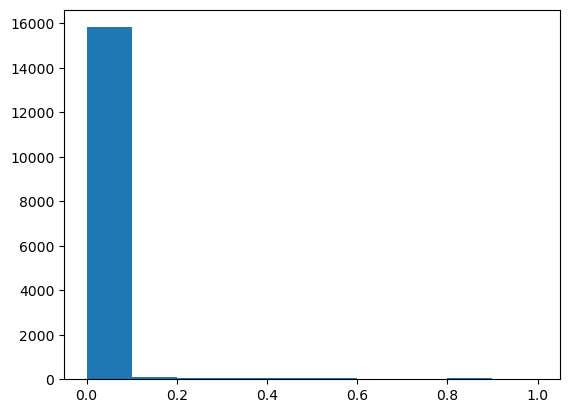

In [71]:
plt.hist([chi2.sf(x, 1) for x in beta_hat**2*N])

In [46]:
df.write_csv('test.csv')

In [47]:
df

CHROM,POS,REF,ALT,FLIP,ID,INFO,IDX,beta_hat,z-score,chi-squared,chi-squared_pval
f64,i64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64
0.0,0,0.0,1.0,0.0,0,0.0,0,1.764052,88.273151,7792.149221,0.0
0.0,1,0.0,1.0,0.0,1,0.0,1,0.400157,20.02386,400.954982,3.4123e-89
0.0,2,0.0,1.0,0.0,2,0.0,3,0.978738,48.976033,2398.651816,0.0
0.0,3,0.0,1.0,0.0,3,0.0,12,2.240893,112.13426,12574.092235,0.0
0.0,4,0.0,1.0,0.0,4,0.0,5,1.867558,93.452572,8733.383208,0.0
…,…,…,…,…,…,…,…,…,…,…,…
0.0,16228,0.0,1.0,0.0,16228,0.0,134985,-1.723403,-86.239036,7437.171401,0.0
0.0,16229,0.0,1.0,0.0,16229,0.0,135048,1.457031,72.90982,5315.841836,0.0
0.0,16230,0.0,1.0,0.0,16230,0.0,135104,0.877467,43.908437,1927.950815,0.0
